Training features:
          age  gender  height  weight  systolic  diastolic  cholesterol  \
47339  21876       1     154    80.0       130         90            2   
67456  16717       2     162    70.0       140         90            1   
12308  21128       2     174    92.0       150        100            1   
32557  23366       2     173    76.0       120         82            1   
664    20281       1     160    60.0       120         80            1   
...      ...     ...     ...     ...       ...        ...          ...   
37194  16001       2     170    75.0       150         80            1   
6265   23209       2     162    73.0       160         90            1   
54886  23589       1     169    74.0       120         80            1   
860    18227       1     167    70.0       120         80            1   
15795  15114       2     177    64.0       120         80            1   

       glucose  smoke  alcohol  active  
47339        1      0        0       1  
67456    

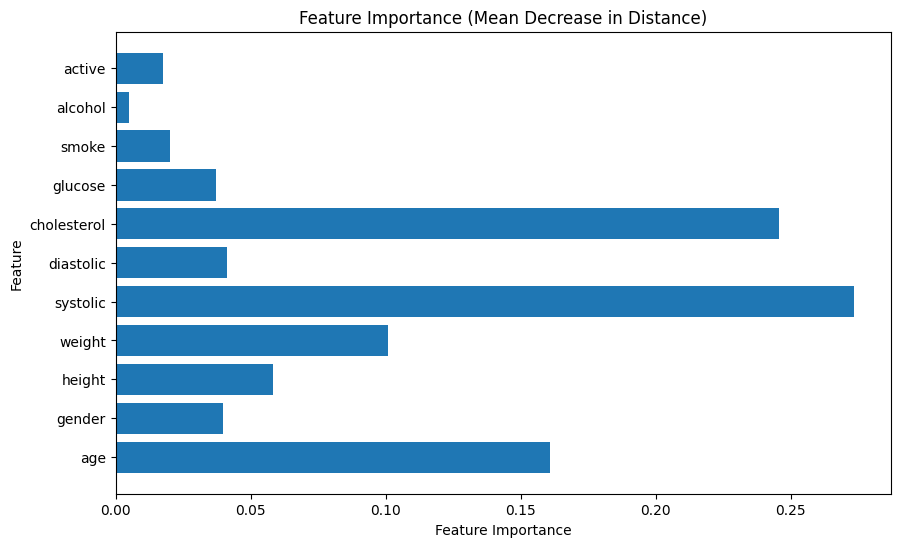

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess data
df = pd.read_csv('cardio_train.csv', sep=';')
df = df. rename(columns={df. columns[5]: 'systolic'})
df = df. rename(columns={df. columns[6]: 'diastolic'})
df = df. rename(columns={df. columns[8]: 'glucose'})
df = df. rename(columns={df. columns[10]: 'alcohol'})
df = df. rename(columns={df. columns[12]: 'disease'})

# Drop target and identify columns
target_col = 'disease'  # Replace with the actual target column name
X = df.drop(target_col, axis=1)  # Features
Y = df[target_col]

# Remove the 'id' column
X = X.drop(['id'], axis=1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Inspect cleaned and split dataset
print("Training features:\n", X_train)
print("Training target distribution:\n", y_train.value_counts())

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Model Accuracy:", accuracy)

# Feature importance (using mean decrease in distance)
feature_importances = np.zeros(X_train_scaled.shape[1])
for i in range(X_train_scaled.shape[1]):
    # Shuffle feature i
    X_test_shuffled = X_test_scaled.copy()
    X_test_shuffled[:, i] = np.random.permutation(X_test_shuffled[:, i])

    # Recalculate accuracy
    shuffled_accuracy = accuracy_score(y_test, knn.predict(X_test_shuffled))
    feature_importances[i] = accuracy - shuffled_accuracy

# Normalize feature importances
feature_importances = feature_importances / feature_importances.sum()

# Plot feature importances
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Mean Decrease in Distance)')
plt.show()